# Pandasで役に立つ機能を学ぼう

## データのサマリの確認方法を学ぼう

In [7]:
import pandas as pd

df_log = pd.read_csv('dataset/product_log.csv')
df_log.head()

,Date,Num,Product
0,2017-01-03,1.0,B
1,2017-01-06,2.0,B
2,2017-01-07,1.0,A
3,2017-01-11,2.0,A
4,2017-01-12,2.0,B


In [8]:
# データサイズが大きい時に、low_memory=Falseを指定
df_log_big = pd.read_csv('dataset/product_log.csv', low_memory=False)
df_log_big.head()

,Date,Num,Product
0,2017-01-03,1.0,B
1,2017-01-06,2.0,B
2,2017-01-07,1.0,A
3,2017-01-11,2.0,A
4,2017-01-12,2.0,B


In [9]:
# 日本語のファイルなどは、encodingを指定して読み込み
df_log_utf8 = pd.read_csv('dataset/product_log.csv', encoding='utf-8')
df_log_utf8.head()

,Date,Num,Product
0,2017-01-03,1.0,B
1,2017-01-06,2.0,B
2,2017-01-07,1.0,A
3,2017-01-11,2.0,A
4,2017-01-12,2.0,B


In [10]:
# Microsoft　Windowsで多い、ShiftJisを拡張したcp932を指定することもある
df_log_cp932 = pd.read_csv('dataset/product_log.csv', encoding="cp932")
df_log_cp932.head()

,Date,Num,Product
0,2017-01-03,1.0,B
1,2017-01-06,2.0,B
2,2017-01-07,1.0,A
3,2017-01-11,2.0,A
4,2017-01-12,2.0,B


In [11]:
#件数
len(df_log)

40

In [12]:
# shapeは(行数, 列数)として出る
df_log.shape

(40, 3)

In [13]:
# 型やメモリの確認
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
Date       40 non-null object
Num        36 non-null float64
Product    40 non-null object
dtypes: float64(1), object(2)
memory usage: 1.0+ KB


In [14]:
df_log_describe = df_log.describe()

In [15]:
df_log_describe

,Num
count,36.000000
mean,3.583333
std,1.421770
min,1.000000
25%,2.000000
50%,4.000000
75%,4.250000
max,6.000000


In [16]:
# 四分位の代わりに  30%点と60%点を表示します
df_log.describe([0.3, 0.6])

,Num
count,36.000000
mean,3.583333
std,1.421770
min,1.000000
30%,3.000000
50%,4.000000
60%,4.000000
max,6.000000


In [17]:
# 50%点は必ず表示されます
df_log.describe([])

,Num
count,36.000000
mean,3.583333
std,1.421770
min,1.000000
50%,4.000000
max,6.000000


In [18]:
# デフォルトでは、数値のみ表示されますが、include='all' で数値以外も表示されます
# uniqueは重複を除いた種類数を、freqは最頻値の個数を表示します
# Dateのtopは、（setを使っているため）表示が変わることがあるのでご注意ください
df_log.describe(include='all')

,Date,Num,Product
count,40,36.000000,40
unique,40,NaN,2
top,2017-02-03,NaN,A
freq,1,NaN,21
mean,NaN,3.583333,NaN
std,NaN,1.421770,NaN
min,NaN,1.000000,NaN
25%,NaN,2.000000,NaN
50%,NaN,4.000000,NaN
75%,NaN,4.250000,NaN


## Pandasでグラフを描画してデータの概要を確かめよう

In [19]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df_case_log = pd.read_csv('dataset/case_log.csv')

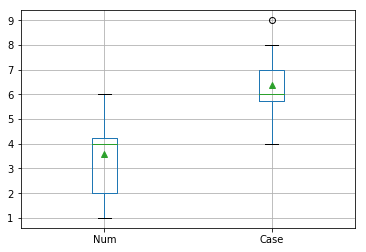

In [20]:
# 箱ひげ図の表示
df_case_log.boxplot(showmeans=True)

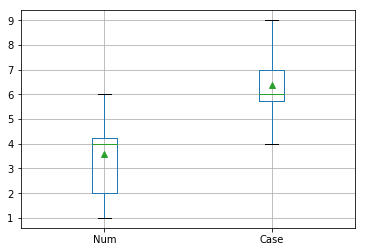

In [21]:
# 箱ひげ図の範囲を広げる
df_case_log.boxplot(showmeans=True, whis=2);

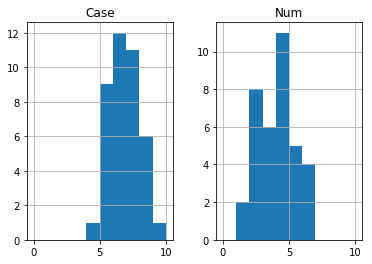

In [22]:
# ヒストグラムの確認
df_case_log.hist(bins=10, range=(0, 10));

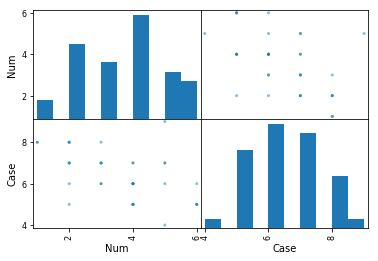

In [23]:
# 散布図行列
pd.plotting.scatter_matrix(df_case_log);

In [25]:
#相関行列
df_corr = df_case_log.corr()
df_corr

,Num,Case
Num,1.000000,-0.506566
Case,-0.506566,1.000000
